<a href="https://colab.research.google.com/github/skyflown/2024-1-my-BDA/blob/main/inclass/05w_0403_wed_A_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.3 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

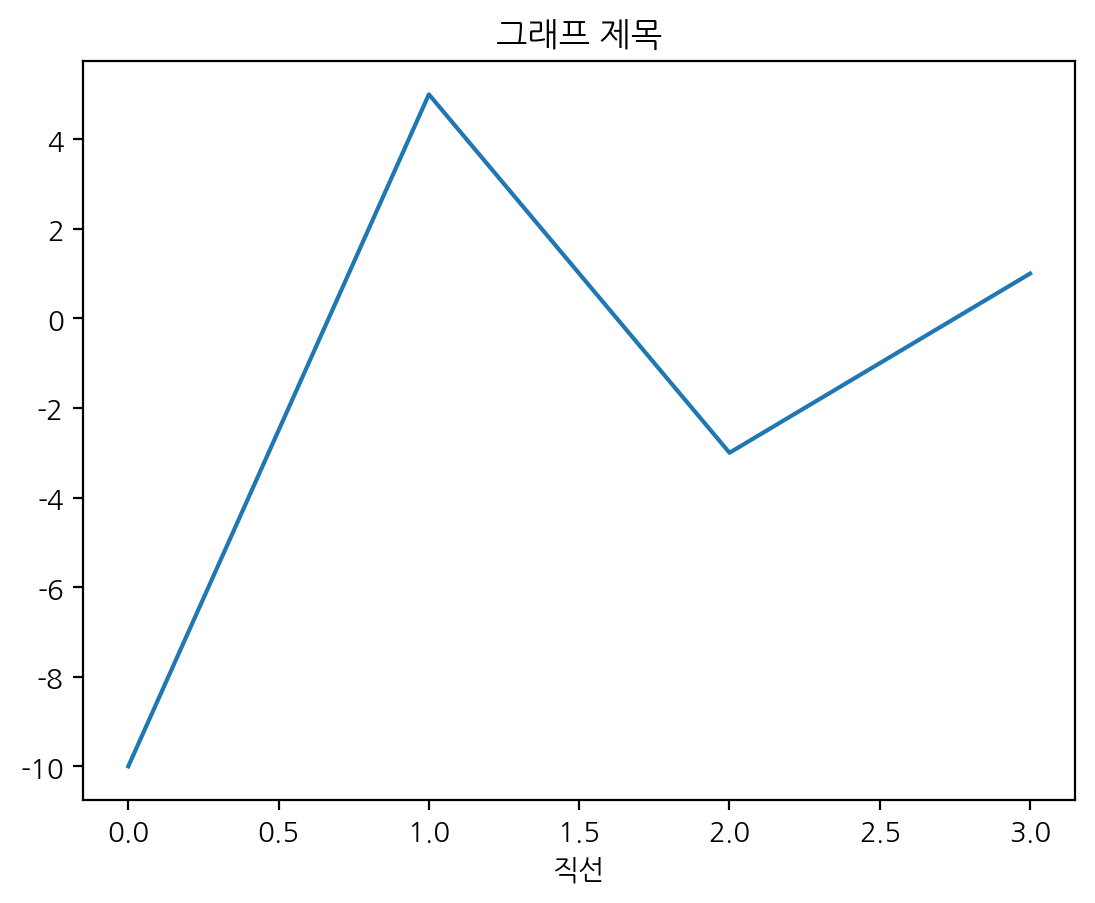

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [6]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.60 MiB/s, done.


In [7]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [8]:
exam.agg("mean") #함수를 적용한 결과를 보여줌. 여러 개 사용가능

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [9]:
exam.agg(["mean", "max", "min", "median"])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
max,20.0,5.0,90.00,98.0,98.00
min,1.0,1.0,20.00,56.0,12.00
median,10.5,3.0,54.00,86.5,62.50


In [10]:
exam.mean()

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [11]:
exam.agg(mean_math=('math', 'mean')) #칼럼 이름 먼저 작성

,math
mean_math,57.45


In [12]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [13]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count']) #np.nan 결측치는 count가 세지 않는다. 짝수 일 때 중간값은 가운데 값 두 개의 평균값.

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [14]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=0) #열에 대한 정보

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0


In [15]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=1) #행에 대한 함수

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


In [16]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis='columns') #행에 대한 정보

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


#### 집단별 요약 통계량 구하기

In [17]:
exam.tail() #nclass 범주형 데이터(1~5)

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [18]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))#반드시 중간고사에 나옴

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [19]:
exam.groupby('nclass').agg(max_math = ('math', 'max'))

,max_math
nclass,
1,60
2,90
3,65
4,75
5,89


In [20]:
exam.groupby('nclass').mean() #결과가 데이터프레임

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [21]:
exam.groupby('nclass').mean()[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [22]:
exam.groupby('nclass').mean()[['math','english','science']]

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [23]:
exam.groupby('nclass').agg("mean") #결과는 차이가 없으나 agg는 다양하게 사용 가능하다

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [24]:
exam.groupby('nclass').agg(["mean", "median"])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [25]:
# 인자 사용 방법: 열 이름은 키워드인 반면, 값 ('열명', '함수명')은 열에서 값을 계산하는 데 사용되는 함수 이름
# 새_열이름 = ('열명', '함수명')
exam.groupby('nclass').agg(mean_math = ('math', 'mean')) #키워드 - 변수처럼 작성

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [26]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [27]:
exam.groupby('nclass').agg(meanMath = ('math','mean'), meanEng=('english','mean'))

,meanMath,meanEng
nclass,,
1,46.25,94.75
2,61.25,84.25
3,45.00,86.50
4,56.75,84.75
5,78.00,74.25


In [28]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

(알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [29]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [30]:
exam.groupby('nclass', as_index = False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


### DataFrameGroupBy 객체

In [31]:
exam.groupby('nclass')

In [32]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [33]:
range(10)

range(0, 10)

In [34]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
exam_gb = exam.groupby('nclass')
exam_gb

In [36]:
list(exam_gb)

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [37]:
for key, value in exam_gb:
  print(key, '\n')
  print(type(value))
  print(value, '\n', '-'*40, '\n')

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

#### 여러 요약 통계량 한 번에 구하기

In [38]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


---

### (알아 두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [39]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [40]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

### 집단별로 다시 집단 나누기

In [41]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info() #mpg 시험문제 예상

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [42]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [43]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [44]:
mpg.sample(frac=.02)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact


In [45]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty=('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [46]:
# 제조 회사와 차종별 분리
# cty 평균 구하기
# hwy 평균 구하기
mpg.groupby(['manufacturer', 'category']).agg(mean_cty=('cty','mean'), mean_hwy=('hwy','mean'))

mean_cty   mean_hwy
manufacturer category                        
audi         compact     17.933333  26.933333
             midsize     16.000000  24.000000
chevrolet    2seater     15.400000  24.800000
             midsize     18.800000  27.600000
             suv         12.666667  17.111111
dodge        minivan     15.818182  22.363636
             pickup      12.052632  16.105263
             suv         11.857143  16.000000
ford         pickup      13.000000  16.428571
             subcompact  15.888889  23.222222
             suv         12.888889  17.777778
honda        subcompact  24.444444  32.555556
hyundai      midsize     19.000000  27.714286
             subcompact  18.285714  26.000000
jeep         suv         13.500000  17.625000
land rover   suv         11.500000  16.500000
lincoln      suv         11.333333  17.000000
mercury      suv         13.250000  18.000000
nissan       compact     20.000000  28.000000
             midsize     20.000000  27.428571
             suv         13.750000  18.000000
pontiac      midsize     17.000000  26.400000
subaru       compact     19.750000  26.000000
             subcompact  19.500000  26.000000
             suv         18.833333  25.000000
toyota       compact     22.250000  30.583333
             midsize     19.857143  28.285714
             pickup      15.571429  19.428571
             suv         14.375000  18.250000
volkswagen   compact     20.785714  28.500000
             midsize     18.571429  27.571429
             subcompact  24.000000  32.833333

In [47]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [48]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()
#없는 것 검색해도 에러 안난다

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [49]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']]

,model
drv,
4,4
f,5
r,10


#### (알아 두면 좋아요) `value_counts()`로 집단별 빈도 간단하게 구하기

In [50]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [51]:
mpg[['drv', 'cyl']].value_counts() #나온 순서대로 같은 것 카운트

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [52]:
mpg[['drv', 'cyl']].value_counts().to_frame() #프레임에서는 쿼리 사용 가능 시리즈는 쿼리가 없음

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [53]:
mpg['drv'].value_counts().query('n > 100') # 오류 발생

AttributeError: 'Series' object has no attribute 'query'

In [54]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [55]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')

,n
drv,
f,106
4,103


### `pandas` 함수 조합하기

In [56]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


### 혼자서 해보기 p.166

## 06-7 데이터 합치기

In [57]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [58]:
test1  # test1 출력

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [59]:
test2  # test2 출력

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [61]:
pd.merge(test1, test2, on='id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [62]:
pd.merge(test1, test2, on='id', how='inner') #아무것도 안쓰면 기본값 how='inner'

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [63]:
test1.merge(test2, on='id', how='inner') #결과는 같음

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### 다른 데이터를 활용해 변수 추가하기

In [64]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [65]:
exam.sample(5)

,id,nclass,math,english,science
3,4,1,30,98,58
7,8,2,90,78,25
19,20,5,78,83,58
16,17,5,65,68,98
13,14,4,48,87,12


In [67]:
exam_new = pd.merge(exam, name, on='nclass', how = 'inner')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기 : concat()

In [68]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [69]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [70]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [71]:
pd.concat([group_a, group_b]) # 리스트로 입력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [72]:
pd.concat([group_a, group_b]).reset_index() # 원 index가 열로 이동, 새로운 시퀀스 지정. 시퀀스 0으로 시작하는 정수 나열

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [74]:
pd.concat([group_a, group_b]).reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


merge() 시험 예상

In [78]:
import pandas as pd

df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']],
                    columns = ['id', 'fruits'])
df1

,id,fruits
0,1,apple
1,2,banana


In [82]:
df2 = pd.DataFrame([[1, 3000],[5, 500]],
                    columns=['id', 'price'])
df2

,id,price
0,1,3000
1,5,500


In [83]:
pd.merge(df1, df2)

,id,fruits,price
0,1,apple,3000


In [84]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [85]:
df1.merge(df2,how='left') #왼쪽 것 중에 있는 것만 씀, 오른쪽 것 겹치면 씀

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [86]:
df1.merge(df2,how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [87]:
df1.merge(df2,how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [88]:
df1.merge(df2,how='cross') # 두 프레임 모두에서 데카르트 곱을 생성하고 왼쪽 키의 순서를 유지

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


### 정리하기

In [ ]:
# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])